## AN√ÅLISIS EXPLORATORIO DEL CINE Y SU RELACI√ìN CON DIFERENTES VARIBLES

Este an√°lisis exploratorio de datos (EDA) se adentra en el mundo del cine con una mirada estad√≠stica. A partir de datos de IMDb y los premios Oscar, se estudian distintas variables que podr√≠an influir en el √©xito de una pel√≠cula, como el presupuesto, la duraci√≥n, los g√©neros o los premios recibidos. Se formulan y comprueban varias hip√≥tesis para buscar patrones que expliquen las valoraciones del p√∫blico. 

El objetivo es descubrir tendencias que, aunque no siempre se ven en pantalla, est√°n presentes en los n√∫meros. El cine se observa aqu√≠ no solo como arte, sino como fen√≥meno medible.

### HIP√ìTESIS:

1. ¬øCuanto mayor el presupuesto de una pel√≠cula, mayor su recaudaci√≥n?

    Analiza correlaci√≥n entre presupuesto y recaudaci√≥n.

2. ¬øLas pel√≠culas ganadoras de premios importantes (Oscar, etc.) reciben m√°s valoraci√≥n del p√∫blico en IMDb?


3. ¬øLa duraci√≥n ideal para obtener una alta valoraci√≥n est√° entre 90 y 120 minutos?


4. ¬øLas pel√≠culas m√°s valoradas tienden a pertenecer a g√©neros m√°s serios (drama, thriller, documental) que a informales como comedia o romance?

5. ¬øLas pel√≠culas con m√°s actores principales son mejor valoradas que las que tienen menos?


### HIP√ìTESIS 1 "Cuanto mayor el presupuesto de una pel√≠cula, mayor su recaudaci√≥n"

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Leemos el archivo CSV y lo guardamos en una variable llamada "df"
movies_5000_df = pd.read_csv("dataF/tmdb_5000_movies.csv")

# Mostramos las primeras 5 filas para ver c√≥mo es el contenido
movies_5000_df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond‚Äôs past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [27]:
movies_5000_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

PASO 2: Filtrar los valores donde budget (presupuesto) o revenue (recaudaci√≥n) sean 0
Vamos a eliminar todas las filas donde:

El presupuesto sea 0.

O la recaudaci√≥n sea 0.

Esto se hace porque un presupuesto o una recaudaci√≥n de 0 significa que no hay dato real o no se conoce, y eso afectar√≠a al an√°lisis.



In [28]:
# Filtramos las filas donde el presupuesto (budget) y la recaudaci√≥n (revenue) sean mayores que 0
dataframe_sin_ceros = movies_5000_df[(movies_5000_df['budget'] > 0) & (movies_5000_df['revenue'] > 0)]

# Mostramos cu√°ntas pel√≠culas quedan despu√©s del filtrado
print("N√∫mero de pel√≠culas despu√©s de filtrar:", len(dataframe_sin_ceros))


N√∫mero de pel√≠culas despu√©s de filtrar: 3229


In [43]:
# Creamos el nuevo DataFrame solo con las columnas que nos interesan
presupuesto_recaudacion_df = dataframe_sin_ceros[['budget', 'revenue']]

# Renombramos las columnas al espa√±ol
presupuesto_recaudacion_df = presupuesto_recaudacion_df.rename(columns={
    'budget': 'presupuesto',
    'revenue': 'recaudacion'
})

# Mostramos el n√∫mero de registros en el nuevo DataFrame
print("N√∫mero de pel√≠culas con presupuesto y recaudaci√≥n v√°lidos:", len(presupuesto_recaudacion_df))

# Mostramos las primeras filas para comprobar los cambios
presupuesto_recaudacion_df.head()

N√∫mero de pel√≠culas con presupuesto y recaudaci√≥n v√°lidos: 3229


presupuesto  recaudacion
0    237000000   2787965087
1    300000000    961000000
2    245000000    880674609
3    250000000   1084939099
4    260000000    284139100

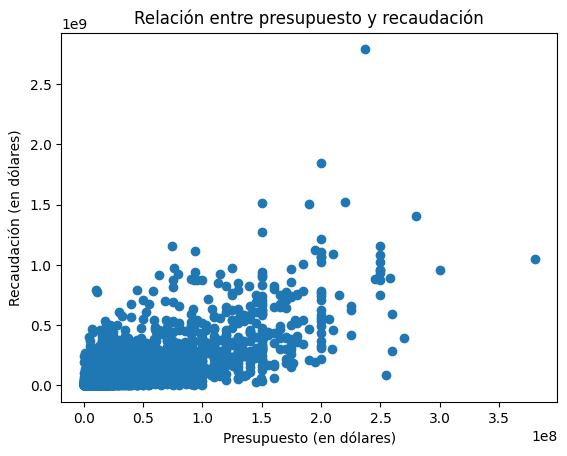

In [30]:
# Creamos el gr√°fico de dispersi√≥n
plt.scatter(presupuesto_recaudacion_df['presupuesto'], presupuesto_recaudacion_df['recaudacion'])

# A√±adimos t√≠tulo y etiquetas a los ejes
plt.title("Relaci√≥n entre presupuesto y recaudaci√≥n")
plt.xlabel("Presupuesto (en d√≥lares)")
plt.ylabel("Recaudaci√≥n (en d√≥lares)")

# Mostramos el gr√°fico
plt.show()

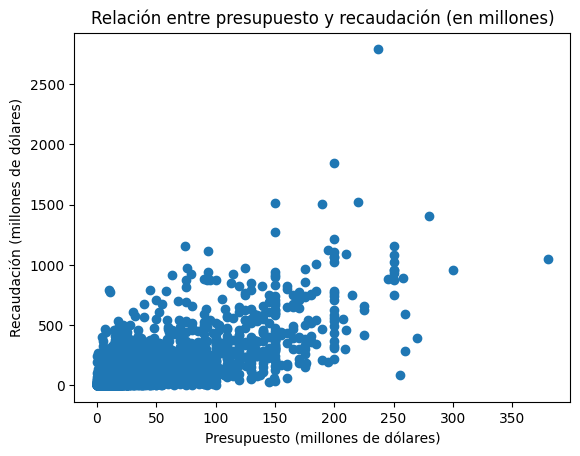

In [31]:

# Creamos el gr√°fico de dispersi√≥n sin modificar el DataFrame original
plt.scatter(
    presupuesto_recaudacion_df['presupuesto'] / 1_000_000,  # Convertimos a millones solo para el gr√°fico
    presupuesto_recaudacion_df['recaudacion'] / 1_000_000   # Convertimos a millones solo para el gr√°fico
)

# A√±adimos t√≠tulo y etiquetas con unidades claras
plt.title("Relaci√≥n entre presupuesto y recaudaci√≥n (en millones)")
plt.xlabel("Presupuesto (millones de d√≥lares)")
plt.ylabel("Recaudaci√≥n (millones de d√≥lares)")

# Mostramos el gr√°fico
plt.show()


In [32]:
# Mostramos los valores m√≠nimo y m√°ximo del presupuesto y la recaudaci√≥n
presupuesto_min = presupuesto_recaudacion_df['presupuesto'].min()
presupuesto_max = presupuesto_recaudacion_df['presupuesto'].max()
recaudacion_min = presupuesto_recaudacion_df['recaudacion'].min()
recaudacion_max = presupuesto_recaudacion_df['recaudacion'].max()

print(f"Presupuesto m√≠nimo: {presupuesto_min:,} $")
print(f"Presupuesto m√°ximo: {presupuesto_max:,} $")
print(f"Recaudaci√≥n m√≠nima: {recaudacion_min:,} $")
print(f"Recaudaci√≥n m√°xima: {recaudacion_max:,} $")


Presupuesto m√≠nimo: 1 $
Presupuesto m√°ximo: 380,000,000 $
Recaudaci√≥n m√≠nima: 5 $
Recaudaci√≥n m√°xima: 2,787,965,087 $


In [33]:
# Pel√≠cula con el presupuesto m√≠nimo
pelicula_presupuesto_min = dataframe_sin_ceros[dataframe_sin_ceros['budget'] == dataframe_sin_ceros['budget'].min()]
print("üé¨ Pel√≠cula con el presupuesto m√≠nimo:")
print(pelicula_presupuesto_min[['title', 'budget', 'revenue']])

# Pel√≠cula con el presupuesto m√°ximo
pelicula_presupuesto_max = dataframe_sin_ceros[dataframe_sin_ceros['budget'] == dataframe_sin_ceros['budget'].max()]
print("\nüé¨ Pel√≠cula con el presupuesto m√°ximo:")
print(pelicula_presupuesto_max[['title', 'budget', 'revenue']])

# Pel√≠cula con la recaudaci√≥n m√≠nima
pelicula_recaudacion_min = dataframe_sin_ceros[dataframe_sin_ceros['revenue'] == dataframe_sin_ceros['revenue'].min()]
print("\nüí∏ Pel√≠cula con la recaudaci√≥n m√≠nima:")
print(pelicula_recaudacion_min[['title', 'budget', 'revenue']])

# Pel√≠cula con la recaudaci√≥n m√°xima
pelicula_recaudacion_max = dataframe_sin_ceros[dataframe_sin_ceros['revenue'] == dataframe_sin_ceros['revenue'].max()]
print("\nüí∏ Pel√≠cula con la recaudaci√≥n m√°xima:")
print(pelicula_recaudacion_max[['title', 'budget', 'revenue']])


üé¨ Pel√≠cula con el presupuesto m√≠nimo:
             title  budget  revenue
4238  Modern Times       1  8500000

üé¨ Pel√≠cula con el presupuesto m√°ximo:
                                          title     budget     revenue
17  Pirates of the Caribbean: On Stranger Tides  380000000  1045713802

üí∏ Pel√≠cula con la recaudaci√≥n m√≠nima:
             title  budget  revenue
3372  Split Second       7        5

üí∏ Pel√≠cula con la recaudaci√≥n m√°xima:
    title     budget     revenue
0  Avatar  237000000  2787965087


In [34]:
# Pel√≠culas con presupuesto menor de 1.000
presupuestos_bajos = dataframe_sin_ceros[dataframe_sin_ceros['budget'] < 1_000]
print("Pel√≠culas con presupuesto < 1.000:", len(presupuestos_bajos))

# Pel√≠culas con recaudaci√≥n menor de 1.000
recaudaciones_bajas = dataframe_sin_ceros[dataframe_sin_ceros['revenue'] < 1_000]
print("Pel√≠culas con recaudaci√≥n < 1.000:", len(recaudaciones_bajas))

# Pel√≠culas que cumplen cualquiera de las dos condiciones
total_sospechosas = dataframe_sin_ceros[
    (dataframe_sin_ceros['budget'] < 1_000) | (dataframe_sin_ceros['revenue'] < 1_000)
]
print("Total pel√≠culas con valores sospechosos:", len(total_sospechosas))


Pel√≠culas con presupuesto < 1.000: 13
Pel√≠culas con recaudaci√≥n < 1.000: 15
Total pel√≠culas con valores sospechosos: 18


üìä Resultados obtenidos:
Pel√≠culas con presupuesto < 1.000 ‚Üí 13

Pel√≠culas con recaudaci√≥n < 1.000 ‚Üí 15

Pel√≠culas con presupuesto o recaudaci√≥n sospechosa (sin contar duplicados) ‚Üí 18

üì¶ Tama√±o del conjunto actual
Recordemos que el DataFrame dataframe_sin_ceros tiene:

üìå 3229 pel√≠culas

üìê C√°lculo del impacto
Vamos a ver qu√© porcentaje representan esas pel√≠culas:

Impacto
=
18
3229
√ó
100
‚âà
0.56
%
Impacto= 
3229
18
‚Äã
 √ó100‚âà0.56%
üîç Menos del 0.6% del total.

‚úÖ Conclusi√≥n
El n√∫mero de pel√≠culas con valores sospechosos es muy peque√±o.

No eliminarlas apenas cambiar√≠a los resultados generales.

S√≠ eliminarlas mejora la claridad visual (gr√°ficos) y evita distorsiones estad√≠sticas.

üìå Por tanto, s√≠ es razonable eliminarlas, porque:

Son claramente datos err√≥neos (1 $ √≥ 5 $ no es real).

Representan menos del 1% del total.

Su exclusi√≥n no altera la muestra significativamente, pero mejora el an√°lisis.



In [35]:
# Eliminamos las pel√≠culas con presupuesto o recaudaci√≥n sospechosamente bajos
dataframe_limpio = dataframe_sin_ceros[
    (dataframe_sin_ceros['budget'] >= 1_000) &
    (dataframe_sin_ceros['revenue'] >= 1_000)
]

# Mostramos cu√°ntas pel√≠culas quedan tras la limpieza
print("N√∫mero de pel√≠culas tras eliminar valores irreales:", len(dataframe_limpio))


N√∫mero de pel√≠culas tras eliminar valores irreales: 3211


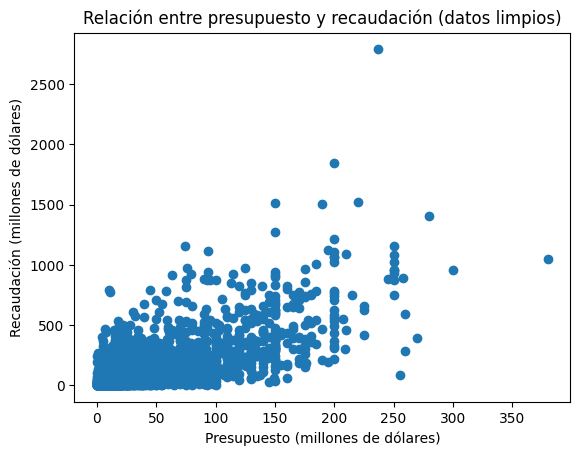

In [36]:
import matplotlib.pyplot as plt

# Dibujamos el gr√°fico usando los datos ya limpios y en millones de d√≥lares
plt.scatter(
    dataframe_limpio['budget'] / 1_000_000,
    dataframe_limpio['revenue'] / 1_000_000
)

# A√±adimos t√≠tulo y etiquetas con unidades
plt.title("Relaci√≥n entre presupuesto y recaudaci√≥n (datos limpios)")
plt.xlabel("Presupuesto (millones de d√≥lares)")
plt.ylabel("Recaudaci√≥n (millones de d√≥lares)")

# Mostramos el gr√°fico
plt.show()


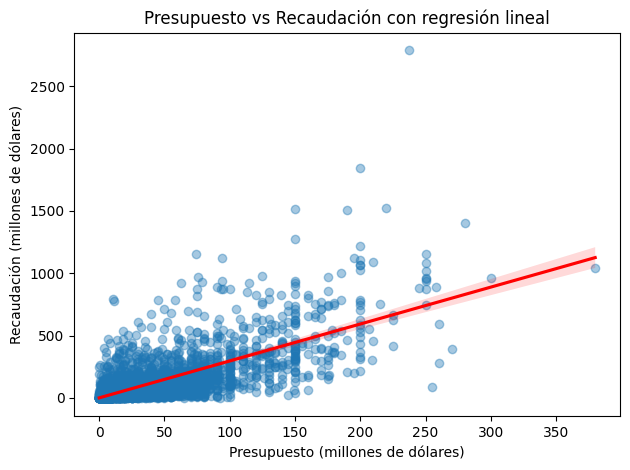

In [ ]:

# Creamos un nuevo DataFrame temporal con valores en millones (sin modificar el original)
df_millones = dataframe_limpio.copy()
df_millones['presupuesto_millones'] = df_millones['budget'] / 1_000_000
df_millones['recaudacion_millones'] = df_millones['revenue'] / 1_000_000

# Creamos el gr√°fico con l√≠nea de regresi√≥n
plt.figure()
sns.regplot(
    x='presupuesto_millones',
    y='recaudacion_millones',
    data=df_millones,
    scatter_kws={'alpha': 0.4},  # puntos semitransparentes
    line_kws={'color': 'red'}    # l√≠nea roja
)

# Etiquetas y t√≠tulo
plt.title("Presupuesto vs Recaudaci√≥n")
plt.xlabel("Presupuesto (millones de d√≥lares)")
plt.ylabel("Recaudaci√≥n (millones de d√≥lares)")
plt.tight_layout()
plt.show()


#### ‚ùì ¬øPor qu√© se llama ‚Äúregresi√≥n‚Äù lineal?
Aunque la palabra suena rara, no tiene nada que ver con retroceder ni con cosas negativas. Viene de un t√©rmino estad√≠stico hist√≥rico, y su significado actual es muy claro:

Regresi√≥n = encontrar una l√≠nea recta (o una curva) que resume la relaci√≥n entre dos variables.

#### üß† En este caso:
Queremos saber:

‚Äú¬øC√≥mo cambia la recaudaci√≥n cuando cambia el presupuesto?‚Äù

La regresi√≥n lineal traza una l√≠nea recta que pasa m√°s o menos por el centro de todos los puntos del gr√°fico de dispersi√≥n.
Esa l√≠nea intenta resumir la relaci√≥n general entre presupuesto y recaudaci√≥n.

#### üéØ ¬øQu√© hace esa l√≠nea?
Si la l√≠nea sube hacia la derecha, significa que cuanto m√°s presupuesto, m√°s recaudaci√≥n ‚Üí relaci√≥n positiva.

Si la l√≠nea bajara, indicar√≠a una relaci√≥n negativa (no es el caso).

Si fuera horizontal, significar√≠a que el presupuesto no influye en la recaudaci√≥n.

üîç El nombre completo ser√≠a ‚Äúregresi√≥n lineal simple‚Äù porque es una recta, y solo relaciona dos variables.

#### üßæ ¬øPor qu√© se usa la palabra ‚Äúregresi√≥n‚Äù?
Hist√≥ricamente, el t√©rmino viene del siglo XIX, cuando el cient√≠fico Francis Galton estudiaba c√≥mo los hijos ‚Äúregresaban‚Äù hacia la estatura media de sus padres.
De ah√≠ el nombre "regresi√≥n hacia la media". Pero hoy ya no tiene ese sentido literal.






#### ‚úÖ Interpretaci√≥n del gr√°fico con regresi√≥n lineal
1. Nube de puntos azules:
Cada punto representa una pel√≠cula.

Como antes, el eje X es el presupuesto, y el eje Y es la recaudaci√≥n (ambos en millones).

2. L√≠nea roja (regresi√≥n lineal):
Es una l√≠nea que resume la tendencia general de los datos.

En este caso, sube hacia la derecha, lo que indica una correlaci√≥n positiva.

3. Franja rosa (banda de confianza):
Muestra un rango de incertidumbre alrededor de la l√≠nea.

M√°s ancha significa m√°s dispersi√≥n en los datos.

#### üìå Conclusi√≥n visual
La l√≠nea muestra que, en general, cuanto mayor es el presupuesto de una pel√≠cula, mayor es su recaudaci√≥n.

#### üéØ Esto apoya visualmente lu hip√≥tesis.

Sin embargo, tambi√©n se nota:

Hay mucha dispersi√≥n: no todas las pel√≠culas caras recaudan mucho.

Algunas pel√≠culas baratas tambi√©n recaudan bien.

A veces, pel√≠culas muy caras no recuperan la inversi√≥n (puntos debajo de la l√≠nea).



Media de recaudaci√≥n por grupo de presupuesto (en millones):
grupo_presupuesto
0‚Äì50M         63.758093
50‚Äì100M      183.510019
100‚Äì150M     391.301975
150‚Äì200M     568.661549
200‚Äì250M     935.767180
250‚Äì300M     659.082923
300‚Äì400M    1045.713802
Name: revenue, dtype: float64


C:\Users\eth-0\AppData\Local\Temp\ipykernel_11512\1400749138.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_recaudacion_por_tramo = df_tramos.groupby('grupo_presupuesto')['revenue'].mean() / 1_000_000  # en millones


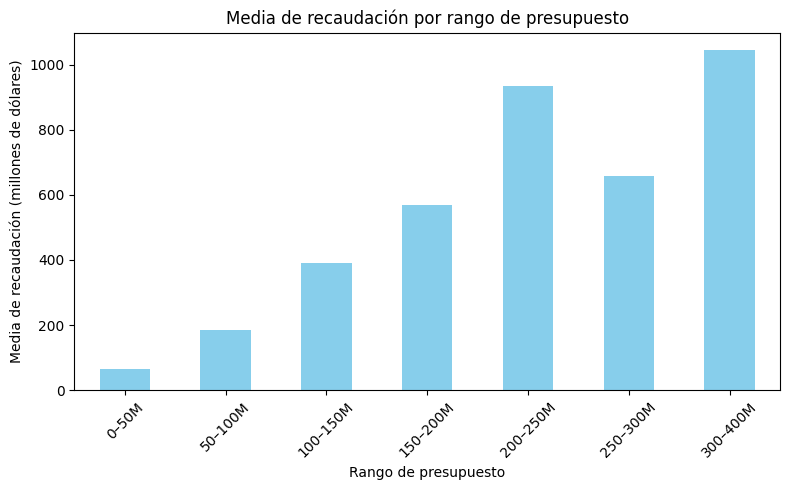

In [38]:

# Copiamos el DataFrame limpio para no modificar el original
df_tramos = dataframe_limpio.copy()

# Creamos los tramos de presupuesto (en millones)
tramos = [0, 50_000_000, 100_000_000, 150_000_000, 200_000_000, 250_000_000, 300_000_000, 400_000_000]
nombres_tramos = ['0‚Äì50M', '50‚Äì100M', '100‚Äì150M', '150‚Äì200M', '200‚Äì250M', '250‚Äì300M', '300‚Äì400M']

# Creamos una nueva columna llamada 'grupo_presupuesto' con esos tramos
df_tramos['grupo_presupuesto'] = pd.cut(df_tramos['budget'], bins=tramos, labels=nombres_tramos)

# Agrupamos por 'grupo_presupuesto' y calculamos la media de recaudaci√≥n
media_recaudacion_por_tramo = df_tramos.groupby('grupo_presupuesto')['revenue'].mean() / 1_000_000  # en millones

# Mostramos los resultados num√©ricos
print("Media de recaudaci√≥n por grupo de presupuesto (en millones):")
print(media_recaudacion_por_tramo)

# Dibujamos el gr√°fico
plt.figure(figsize=(8, 5))
media_recaudacion_por_tramo.plot(kind='bar', color='skyblue')

# A√±adimos etiquetas y t√≠tulo
plt.title("Media de recaudaci√≥n por rango de presupuesto")
plt.xlabel("Rango de presupuesto")
plt.ylabel("Media de recaudaci√≥n (millones de d√≥lares)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# Contamos cu√°ntas pel√≠culas hay en cada grupo de presupuesto
conteo_por_grupo = df_tramos['grupo_presupuesto'].value_counts().sort_index()
print("N√∫mero de pel√≠culas por grupo de presupuesto:")
print(conteo_por_grupo)


N√∫mero de pel√≠culas por grupo de presupuesto:
grupo_presupuesto
0‚Äì50M       2354
50‚Äì100M      579
100‚Äì150M     175
150‚Äì200M      76
200‚Äì250M      19
250‚Äì300M       7
300‚Äì400M       1
Name: count, dtype: int64


Distribuci√≥n de pel√≠culas por grupo de presupuesto

| Grupo de presupuesto | Pel√≠culas | ¬øEs representativo?     |
|----------------------|-----------|--------------------------|
| 0‚Äì50M                | 2354      | ‚úÖ Muy representativo    |
| 50‚Äì100M              | 579       | ‚úÖ Bastante fiable       |
| 100‚Äì150M             | 175       | ‚úÖ Aceptable             |
| 150‚Äì200M             | 76        | ‚ö†Ô∏è Empieza a ser limitado |
| 200‚Äì250M             | 19        | ‚ö†Ô∏è Cuidado               |
| 250‚Äì300M             | 7         | ‚ùå Muy poca muestra      |
| 300‚Äì400M             | 1         | ‚ùå Nada representativo   |


üîç ¬øQu√© significa esto para el grupo 250‚Äì300M?
Solo hay 7 pel√≠culas en ese grupo.

Con tan poca muestra, un solo fracaso puede bajar much√≠simo la media.

Estad√≠sticamente, ese grupo no es fiable para sacar conclusiones.

üëâ Por eso la media de recaudaci√≥n en ese tramo aparece m√°s baja:
no es que las pel√≠culas de 250‚Äì300M vayan mal, sino que hay muy poca informaci√≥n para saberlo.

‚úÖ Conclusi√≥n clave
‚ÄúLa tendencia general muestra que a mayor presupuesto, mayor recaudaci√≥n media.
Aunque puede haber irregularidades en grupos con muy pocas pel√≠culas, como el de 250‚Äì300 millones, donde la muestra es demasiado peque√±a para sacar conclusiones fiables.‚Äù

üîç  "no me contradice la hip√≥tesis, pero tampoco me permite afirmarla en ese tramo".

In [40]:
correlacion = dataframe_limpio['budget'].corr(dataframe_limpio['revenue'])
print(f"Coeficiente de correlaci√≥n: {correlacion:.2f}")


Coeficiente de correlaci√≥n: 0.70




## üß† ¬øQu√© es la correlaci√≥n?

La **correlaci√≥n** es una medida matem√°tica que sirve para saber si **dos cosas est√°n relacionadas**.
En nuestro caso:

> ¬øEst√°n relacionadas el presupuesto de una pel√≠cula y lo que recauda?

Es decir:
üìà ¬øCuando sube el presupuesto, tambi√©n sube la recaudaci√≥n?
üìâ ¬øO no hay relaci√≥n, o incluso ocurre lo contrario?



## üß™ ¬øC√≥mo se mide?

Se calcula un **n√∫mero** que se llama **coeficiente de correlaci√≥n de Pearson**.
Ese n√∫mero siempre est√° entre **-1 y 1**:

| Valor de la correlaci√≥n | Significado claro                                                |
| ----------------------- | ---------------------------------------------------------------- |
| `1`                     | Correlaci√≥n **perfecta positiva**: cuando sube A, siempre sube B |
| `0.8 a 1`               | Correlaci√≥n fuerte positiva                                      |
| `0.5 a 0.8`             | Correlaci√≥n moderada positiva                                    |
| `0.3 a 0.5`             | Correlaci√≥n d√©bil positiva                                       |
| `0`                     | **Sin relaci√≥n**                                                 |
| `-0.3 a -1`             | Correlaci√≥n negativa (cuando sube A, baja B)                     |



### üéØ En este caso:

Queremos ver si el n√∫mero est√° **cerca de 1**, lo cual **apoyar√≠a la hip√≥tesis**:

> ‚ÄúA mayor presupuesto, mayor recaudaci√≥n‚Äù.




## üßæ ¬øQu√© hacer con ese n√∫mero?

Si, por ejemplo, te da:

* `0.75` ‚Üí **Relaci√≥n moderadamente fuerte** ‚Üí Tu hip√≥tesis est√° bien apoyada.
* `0.25` ‚Üí Relaci√≥n d√©bil ‚Üí Tu hip√≥tesis **no tiene mucho respaldo**.
* `0.90` ‚Üí Relaci√≥n fuerte ‚Üí **Tu hip√≥tesis est√° muy bien respaldada**.



In [41]:
# Renombramos las columnas en espa√±ol para coherencia general
dataframe_limpio = dataframe_limpio.rename(columns={
    'budget': 'presupuesto',
    'revenue': 'recaudacion'
})


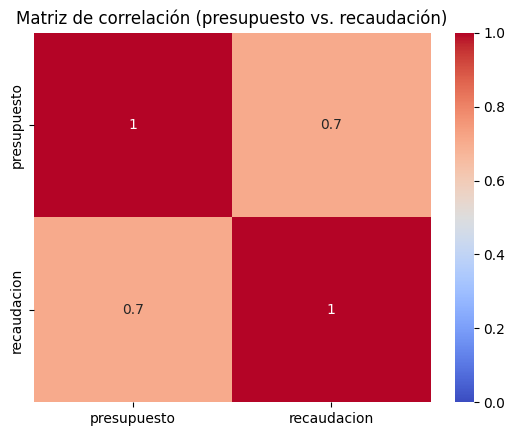

In [42]:
# Calculamos la matriz de correlaci√≥n
matriz_corr = dataframe_limpio[['presupuesto', 'recaudacion']].corr()

# Dibujamos el mapa de calor
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de correlaci√≥n (presupuesto vs. recaudaci√≥n)")
plt.show()


# ‚úÖ Conclusi√≥n de la hip√≥tesis

### ‚ÄúCuanto mayor el presupuesto de una pel√≠cula, mayor su recaudaci√≥n.‚Äù

---

## üîç An√°lisis general

- Se han analizado **3211 pel√≠culas** reales.
- Se eliminaron aquellas con datos irreales (por ejemplo, presupuestos de 1 d√≥lar o recaudaciones de 5 d√≥lares).
- Se trabaj√≥ solo con pel√≠culas que tienen **presupuesto y recaudaci√≥n iguales o superiores a 1.000 d√≥lares**, para asegurar que los resultados fueran fiables y representativos.

---

## üìä Resultados visuales (gr√°fico de dispersi√≥n con l√≠nea de tendencia)

- Se represent√≥ cada pel√≠cula en un gr√°fico, donde el eje horizontal muestra el presupuesto y el eje vertical la recaudaci√≥n.
- Al a√±adir una **l√≠nea de tendencia**, se observ√≥ que:
  - **A mayor presupuesto, la recaudaci√≥n tiende a ser mayor**.
  - Aunque no todas las pel√≠culas siguen esta regla, **la mayor√≠a s√≠ lo hace**.

---

## üìà An√°lisis por grupos de presupuesto (medias por tramo)

- Las pel√≠culas se agruparon por rangos de presupuesto (0‚Äì50M, 50‚Äì100M, etc.).
- Se calcul√≥ la **recaudaci√≥n media** dentro de cada grupo.
- El resultado mostr√≥ una **tendencia creciente**:
  - Las pel√≠culas con **mayor presupuesto recaudan m√°s de media**.
  - Por ejemplo, las que cuestan m√°s de 200 millones recaudan de media entre 900 y 1.000 millones o m√°s.
- El grupo 250‚Äì300M rompi√≥ un poco la tendencia, pero se debe a que solo hay **7 pel√≠culas** en ese tramo, por lo que **no es estad√≠sticamente representativo**.

---

## üìê Resultado estad√≠stico: correlaci√≥n

- Se calcul√≥ el coeficiente de correlaci√≥n entre presupuesto y recaudaci√≥n.
- El resultado fue: **`0.70`**.
- Esto indica una **relaci√≥n positiva moderadamente fuerte**:
  - Cuando sube el presupuesto, **la recaudaci√≥n tambi√©n suele subir**.
  - No es una regla perfecta, pero s√≠ se cumple en muchos casos.

---

## ‚úÖ Conclusi√≥n final

> **S√≠**, los datos respaldan la hip√≥tesis.
> En general, **cuanto mayor es el presupuesto de una pel√≠cula, mayor suele ser su recaudaci√≥n**.
> Aunque hay excepciones, los datos muestran una **tendencia clara**, tanto visual como num√©ricamente.
